In [83]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
#%matplotlib notebook

from numpy.linalg import inv
from numpy import linalg as LA
from scipy import linalg
import random

from matplotlib import animation, rc
from IPython.display import HTML

In [216]:
df = pd.read_csv('training_data.csv')

In [217]:
FM = df.values
dim = np.shape(FM)

In [218]:
x = np.linspace(0,1,n_nodes)

In [219]:
#ignore rotations and moments

F = FM[:,0:int(dim[1]/2)]
F = F[:,0::2]
F = F/F.max()
D = FM[:,int(dim[1]/2):] 
D = D[:,0::2]
D = D/D.max()

In [220]:
#Training data

n_timesteps, n_nodes = np.shape(D)
d = 10 #number of steps in "model memory"
t = d

X_train = np.zeros([n_timesteps-d, 2*d*n_nodes+n_nodes])
Y_train = np.zeros([n_timesteps-d, n_nodes])


for i in range(n_timesteps-d):
    
    bulk = 0
    for j in range(n_nodes):
        X_train[i, bulk:bulk + d+1] = F[t-d:t+1,j]    
        bulk += d+1
    
    for j in range(n_nodes):
        X_train[i, bulk:bulk + d] = D[t-d:t,j]
        bulk += d
    
    #for j in range(n_nodes):
     #   X_train[i, bulk: bulk + d] = Dt[t-d:t,j]/rt_max
      #  bulk += d

    Y_train[i, 0:n_nodes] = D[t, :]
    #Y_train[i, n_nodes:] = Dt[i, :]/rt_max
    t += 1


In [237]:
#Neural network

train_portion = 0.8
input_dim = len(X_train[0,:])
output_dim = len(Y_train[0,:])

x_train = X_train[0:int(n_timesteps*train_portion),:]
x_test = X_train[int(n_timesteps*(train_portion)):,:]
y_train = Y_train[0:int(n_timesteps*train_portion),:]
y_test = Y_train[int(n_timesteps*(train_portion)):,:]

def baseline_model():
    model = Sequential()
    height = 200
    model.add(Dense(height, input_dim=input_dim, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(output_dim, input_dim=height, activation='linear', kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer="adam")
    return model



# Training the model
model = baseline_model()
model.fit(x_train, y_train, epochs=100, verbose = 1)

Epoch 1/100
15203/15203 [==============================] - 3s 173us/step - loss: 5.9015e-04
Epoch 2/100
15203/15203 [==============================] - 2s 141us/step - loss: 1.4817e-04
Epoch 3/100
15203/15203 [==============================] - 2s 144us/step - loss: 1.4050e-04
Epoch 4/100
15203/15203 [==============================] - 2s 163us/step - loss: 1.1722e-04
Epoch 5/100
15203/15203 [==============================] - 2s 156us/step - loss: 1.0933e-04
Epoch 6/100
15203/15203 [==============================] - 2s 112us/step - loss: 1.1355e-04
Epoch 7/100
15203/15203 [==============================] - 2s 116us/step - loss: 1.0515e-04
Epoch 8/100
15203/15203 [==============================] - 2s 120us/step - loss: 1.1210e-04
Epoch 9/100
15203/15203 [==============================] - 2s 108us/step - loss: 1.1232e-04
Epoch 10/100
15203/15203 [==============================] - 2s 109us/step - loss: 1.1498e-04
Epoch 11/100
15203/15203 [==============================] - 2s 116us/step - los

15203/15203 [==============================] - 2s 121us/step - loss: 3.8985e-05
Epoch 90/100
15203/15203 [==============================] - 2s 119us/step - loss: 3.2187e-05
Epoch 91/100
15203/15203 [==============================] - 2s 121us/step - loss: 3.9309e-05
Epoch 92/100
15203/15203 [==============================] - 2s 122us/step - loss: 9.2368e-05
Epoch 93/100
15203/15203 [==============================] - 2s 121us/step - loss: 3.4044e-05
Epoch 94/100
15203/15203 [==============================] - 2s 120us/step - loss: 3.3580e-05
Epoch 95/100
15203/15203 [==============================] - 2s 121us/step - loss: 3.8893e-05
Epoch 96/100
15203/15203 [==============================] - 2s 120us/step - loss: 3.2533e-05
Epoch 97/100
15203/15203 [==============================] - 2s 122us/step - loss: 3.6537e-05
Epoch 98/100
15203/15203 [==============================] - 2s 121us/step - loss: 3.8033e-05
Epoch 99/100
15203/15203 [==============================] - 2s 120us/step - loss: 2

In [238]:
predictions = model.predict(x_test)

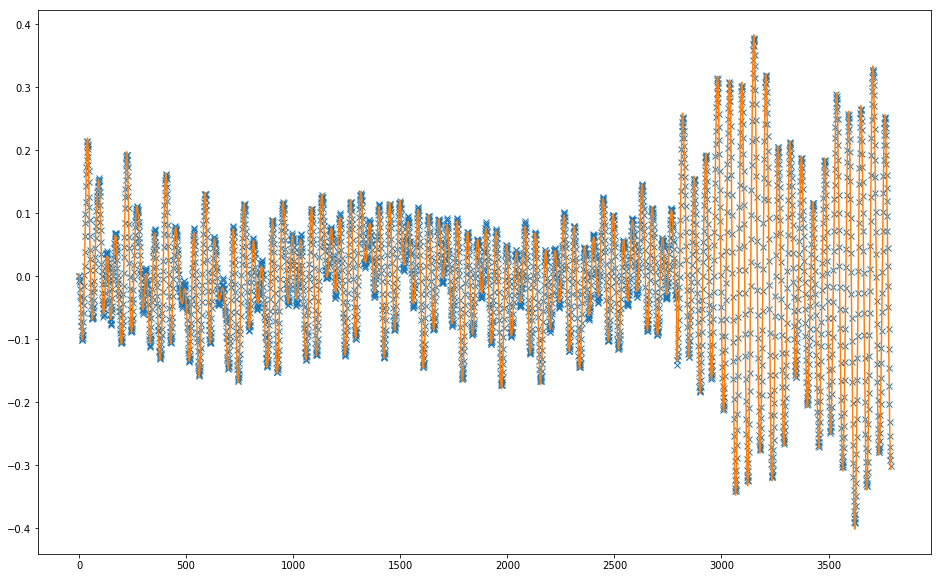

In [239]:
plt.figure(figsize=(16,10))
plt.plot(predictions[:,n_nodes-1], 'x')
plt.plot(y_test[:, n_nodes-1])
plt.show()

In [240]:
#Errorfunction
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [241]:
#Error
print(rmse(predictions[:,n_nodes-1], y_test[:,n_nodes-1]))

0.00496243234435


In [242]:
#Total error
error = 0
for i in range(len(predictions[:,0])):
    error += np.trapz((y_test[i,:] - predictions[i,:])**2, x)

print(error)

0.0380072751474


In [243]:
#independent prediction

input_i = np.copy(x_test[0,:])

dz = np.copy(input_i[(d+1)*n_nodes:])

dz = np.reshape(dz, (n_nodes, d))


#dzt = np.copy(input_i[d+1+n_nodes*d:])
#dzt = np.reshape(dzt, (n_nodes, d))

preds = np.zeros([len(x_test[:,0])-1, n_nodes])
force = np.copy(x_test[:, 0:(d+1)*n_nodes])

for i in range(len(x_test[:,0])-1):
    
    
    pred = model.predict(np.reshape(input_i,(1,len(input_i))))
    preds[i, :] = pred
    
    input_i[0:(d+1)*n_nodes] = force[i+1,:]
    
    dz = np.delete(dz, 0, 1)
    dz = np.concatenate((dz, np.reshape(pred[0,:], (1,n_nodes)).T), axis=1)
    dz[0,:] = np.zeros(d)
    #dzt = np.delete(dzt, 0, 1)
    #dzt = np.concatenate((dzt, np.reshape(pred[0,n_nodes:], (1, n_nodes)).T), axis=1)
    #dzt[0,:] = np.zeros(n_nodes)
    input_i[(d+1)*n_nodes:] = np.reshape(dz, (1, n_nodes*d))[0]
    #input_i[d+1+n_nodes*d:] = np.reshape(dzt, (1, n_nodes*d))[0]
    

    

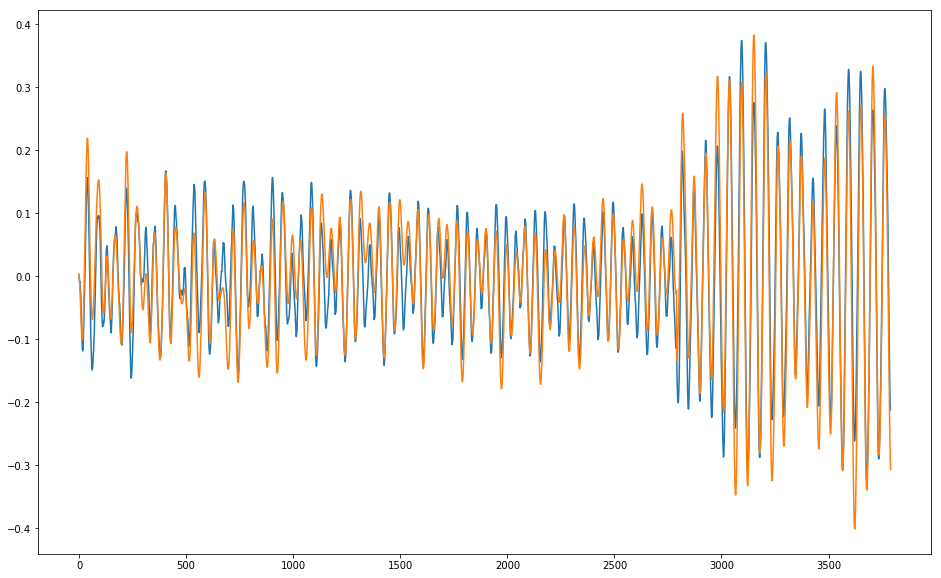

In [244]:
plt.figure(figsize=(16,10))
plt.plot(preds[:,n_nodes-1], '-')
plt.plot(y_test[:, n_nodes-1])
plt.show()

In [245]:
#Error
print(rmse(preds[:,n_nodes-1], y_test[:-1,n_nodes-1]))

0.0447303704962


In [246]:
#Total error
error = 0
for i in range(len(preds[:,0])):
    error += np.trapz((y_test[i,:] - preds[i,:])**2, x)

print(error)

4.23475192615


In [247]:
#Export results
np.savetxt("predictions.csv", predictions, delimiter=",")
np.savetxt("preds.csv", preds, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")